In [1]:
import pandas as pd
import numpy as np

In [2]:
#in results.pkl ci sono le labels e le probabilità di ogni classe calcolate dal modello per ciascuna riga
results=pd.read_pickle('cv_ino.pkl')

In [3]:
results.isnull().sum().sum()

0

In [4]:
#Funzioni di supporto
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def print_scores(test_labels, test_probs, ):
    print('\nClassification Report\n')
    classes = ["Ortorombic","Tetragonal","Monoclinic","Trigonal","Hexagonal","Triclinic","Cubic"]
    print(classification_report(labels, preds, target_names=classes))
    accuracy = accuracy_score(labels, preds)
    print('\nAccuracy: {:.2f}\n'.format(accuracy))

    print('Micro Precision: {:.2f}'.format(precision_score(labels, preds, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(labels, preds, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(labels, preds, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(labels, preds, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(labels, preds, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(labels, preds, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(labels, preds, average='weighted')))
    cm=confusion_matrix(labels, preds)
    plot_confusion_matrix(cm,target_names=classes, normalize=True,)
    return accuracy

In [5]:
labels = results['class'].values
labels=labels.astype(int)
probabilities=results[[0,1,2,3,4,5,6]]

In [6]:
probabilities

,0,1,2,3,4,5,6
0,0.975543,0.000713,0.009167,0.008374,0.005830,2.638866e-04,0.000109
1,0.000002,0.000005,0.000019,0.999963,0.000007,8.094445e-07,0.000003
2,0.006440,0.933587,0.000589,0.049217,0.001462,4.196113e-04,0.008286
3,0.980647,0.004086,0.004767,0.005102,0.004930,3.380962e-04,0.000130
4,0.000085,0.000180,0.003271,0.991141,0.005188,6.306934e-05,0.000072
...,...,...,...,...,...,...,...
77893,0.562319,0.002343,0.009581,0.002023,0.422983,6.314825e-04,0.000120
77894,0.439326,0.011142,0.050009,0.035381,0.459628,3.819199e-03,0.000694
77895,0.002565,0.000023,0.995771,0.000318,0.000061,1.252181e-03,0.000009
77896,0.000007,0.003169,0.000004,0.000114,0.000046,4.464872e-05,0.996615


In [7]:
preds = probabilities.apply(np.argmax, axis=1).values

In [8]:
print('\nClassification Report\n')
classes=["Ortorombic","Tetragonal","Monoclinic","Trigonal","Hexagonal","Triclinic","Cubic"]
print(classification_report(labels, preds, target_names=classes))


Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.66      0.73      0.69     15714
  Tetragonal       0.81      0.78      0.79      8909
  Monoclinic       0.72      0.66      0.69     19051
    Trigonal       0.74      0.75      0.75      6930
   Hexagonal       0.83      0.80      0.81      6468
   Triclinic       0.59      0.55      0.57      6197
       Cubic       0.94      0.98      0.96     14627

    accuracy                           0.76     77896
   macro avg       0.75      0.75      0.75     77896
weighted avg       0.76      0.76      0.76     77896



In [9]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(labels, preds)))

print('Micro Precision: {:.2f}'.format(precision_score(labels, preds, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(labels, preds, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(labels, preds, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(labels, preds, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(labels, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(labels, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(labels, preds, average='weighted')))


Accuracy: 0.76

Micro Precision: 0.76
Micro Recall: 0.76
Micro F1-score: 0.76

Macro Precision: 0.75
Macro Recall: 0.75
Macro F1-score: 0.75

Weighted Precision: 0.76
Weighted Recall: 0.76
Weighted F1-score: 0.76


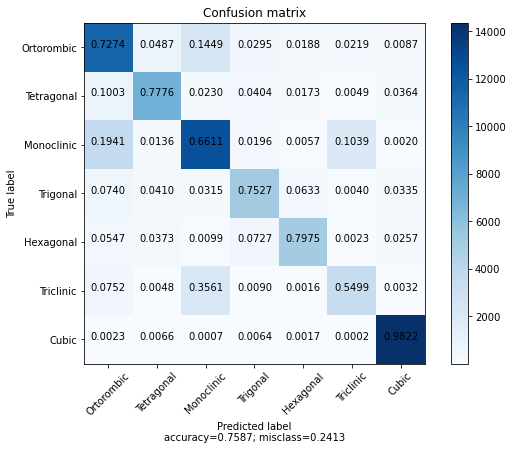

[[11431   766  2277   463   296   344   137]
 [  894  6928   205   360   154    44   324]
 [ 3697   259 12595   374   108  1979    39]
 [  513   284   218  5216   439    28   232]
 [  354   241    64   470  5158    15   166]
 [  466    30  2207    56    10  3408    20]
 [   34    96    10    93    25     3 14366]]


In [10]:
cm=confusion_matrix(labels, preds)
plot_confusion_matrix(cm,target_names=classes, normalize=True,)
print(cm)

---

## Confidence 

In [14]:
#Proviamo a droppare le righe nelle quali la differenza tra la prima probavilità e la seconda è minore
#di una soglia 
confidence = pd.DataFrame(columns=[['Threshold', 'Accuracy','% dropped']])
results=pd.read_pickle('cv_ino_conf.pkl')
results

,class,0,1,2,3,4,5,6,conf
64073,6,8.764617e-06,0.000958,5.677804e-06,0.000026,0.000014,0.000031,0.998957,0.998000
64078,6,1.590699e-06,0.000233,9.012357e-07,0.000005,0.000003,0.000006,0.999751,0.999517
64080,6,9.394191e-07,0.000304,4.009201e-07,0.000006,0.000003,0.000004,0.999681,0.999378
64081,6,5.673672e-07,0.000114,2.416432e-07,0.000002,0.000001,0.000002,0.999880,0.999766
64084,6,3.485509e-05,0.001367,1.658898e-05,0.000057,0.000032,0.000067,0.998427,0.997060
...,...,...,...,...,...,...,...,...,...
77893,4,5.623186e-01,0.002343,9.580570e-03,0.002023,0.422983,0.000631,0.000120,0.139335
77894,2,4.393257e-01,0.011142,5.000906e-02,0.035381,0.459628,0.003819,0.000694,0.020302
77895,2,2.565151e-03,0.000023,9.957712e-01,0.000318,0.000061,0.001252,0.000009,0.993206
77896,6,6.786139e-06,0.003169,4.411817e-06,0.000114,0.000046,0.000045,0.996615,0.993446


<AxesSubplot:ylabel='Frequency'>

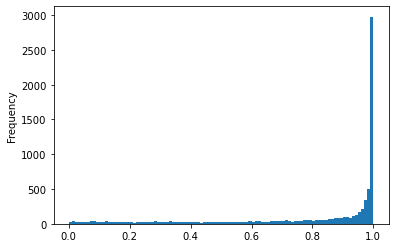

In [15]:
%matplotlib inline
results['conf'].plot.hist(bins=100)

************************************
THRESHOLD 0  INDEXES TO DROP:  0
LEN FILTERED  7789
LEN UNFILTERED  7789
Percentuale casi eliminati 0.0 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.55      0.61      0.58      1571
  Tetragonal       0.69      0.65      0.67       891
  Monoclinic       0.59      0.61      0.60      1905
    Trigonal       0.68      0.58      0.63       693
   Hexagonal       0.81      0.60      0.69       646
   Triclinic       0.47      0.59      0.52       620
       Cubic       0.97      0.93      0.95      1463

    accuracy                           0.67      7789
   macro avg       0.68      0.65      0.66      7789
weighted avg       0.68      0.67      0.67      7789


Accuracy: 0.67

Micro Precision: 0.67
Micro Recall: 0.67
Micro F1-score: 0.67

Macro Precision: 0.68
Macro Recall: 0.65
Macro F1-score: 0.66

Weighted Precision: 0.68
Weighted Recall: 0.67
Weighted F1-score: 0.67


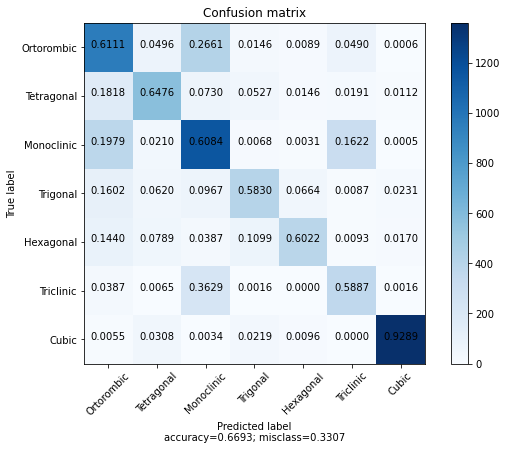

************************************
THRESHOLD 0.1  INDEXES TO DROP:  309
LEN FILTERED  7480
LEN UNFILTERED  7789
Percentuale casi eliminati 3.97 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.57      0.62      0.59      1487
  Tetragonal       0.70      0.67      0.69       851
  Monoclinic       0.60      0.62      0.61      1823
    Trigonal       0.70      0.60      0.65       653
   Hexagonal       0.83      0.62      0.71       621
   Triclinic       0.47      0.60      0.53       595
       Cubic       0.97      0.94      0.95      1450

    accuracy                           0.68      7480
   macro avg       0.69      0.67      0.68      7480
weighted avg       0.70      0.68      0.69      7480


Accuracy: 0.68

Micro Precision: 0.68
Micro Recall: 0.68
Micro F1-score: 0.68

Macro Precision: 0.69
Macro Recall: 0.67
Macro F1-score: 0.68

Weighted Precision: 0.70
Weighted Recall: 0.68
Weighted F1-score: 0.69


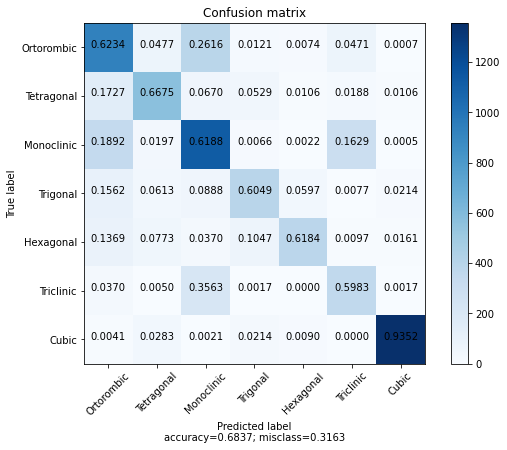

************************************
THRESHOLD 0.2  INDEXES TO DROP:  560
LEN FILTERED  7229
LEN UNFILTERED  7789
Percentuale casi eliminati 7.19 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.59      0.63      0.61      1439
  Tetragonal       0.72      0.69      0.70       821
  Monoclinic       0.61      0.63      0.62      1754
    Trigonal       0.72      0.63      0.67       618
   Hexagonal       0.85      0.63      0.72       594
   Triclinic       0.48      0.60      0.53       567
       Cubic       0.98      0.94      0.96      1436

    accuracy                           0.70      7229
   macro avg       0.71      0.68      0.69      7229
weighted avg       0.71      0.70      0.70      7229


Accuracy: 0.70

Micro Precision: 0.70
Micro Recall: 0.70
Micro F1-score: 0.70

Macro Precision: 0.71
Macro Recall: 0.68
Macro F1-score: 0.69

Weighted Precision: 0.71
Weighted Recall: 0.70
Weighted F1-score: 0.70


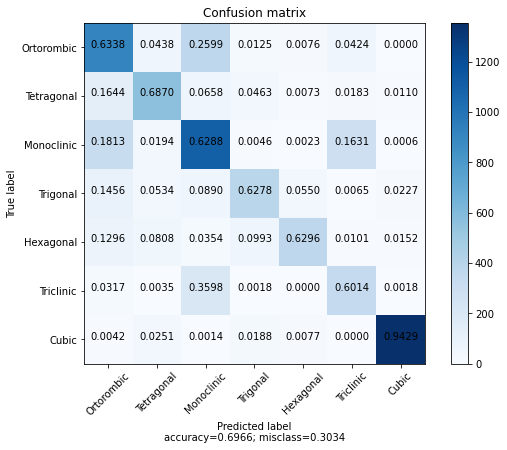

************************************
THRESHOLD 0.3  INDEXES TO DROP:  804
LEN FILTERED  6985
LEN UNFILTERED  7789
Percentuale casi eliminati 10.32 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.60      0.64      0.62      1382
  Tetragonal       0.73      0.70      0.72       796
  Monoclinic       0.61      0.64      0.62      1677
    Trigonal       0.73      0.64      0.68       588
   Hexagonal       0.86      0.64      0.73       567
   Triclinic       0.48      0.60      0.54       554
       Cubic       0.98      0.95      0.96      1421

    accuracy                           0.71      6985
   macro avg       0.71      0.69      0.70      6985
weighted avg       0.72      0.71      0.71      6985


Accuracy: 0.71

Micro Precision: 0.71
Micro Recall: 0.71
Micro F1-score: 0.71

Macro Precision: 0.71
Macro Recall: 0.69
Macro F1-score: 0.70

Weighted Precision: 0.72
Weighted Recall: 0.71
Weighted F1-score: 0.71


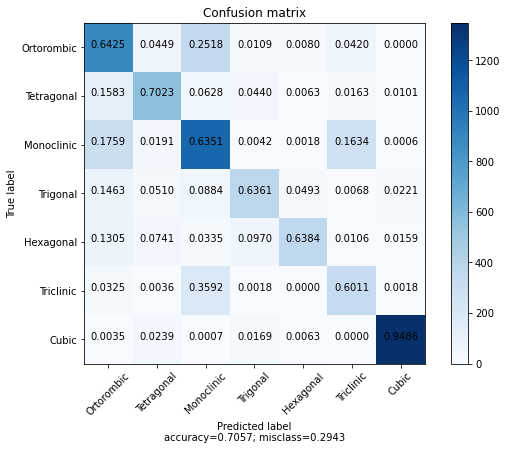

************************************
THRESHOLD 0.4  INDEXES TO DROP:  1068
LEN FILTERED  6721
LEN UNFILTERED  7789
Percentuale casi eliminati 13.71 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.61      0.65      0.63      1324
  Tetragonal       0.75      0.72      0.73       767
  Monoclinic       0.62      0.65      0.63      1590
    Trigonal       0.75      0.65      0.70       566
   Hexagonal       0.88      0.65      0.74       539
   Triclinic       0.49      0.61      0.54       526
       Cubic       0.98      0.95      0.96      1409

    accuracy                           0.72      6721
   macro avg       0.72      0.70      0.71      6721
weighted avg       0.73      0.72      0.72      6721


Accuracy: 0.72

Micro Precision: 0.72
Micro Recall: 0.72
Micro F1-score: 0.72

Macro Precision: 0.72
Macro Recall: 0.70
Macro F1-score: 0.71

Weighted Precision: 0.73
Weighted Recall: 0.72
Weighted F1-score: 0.72


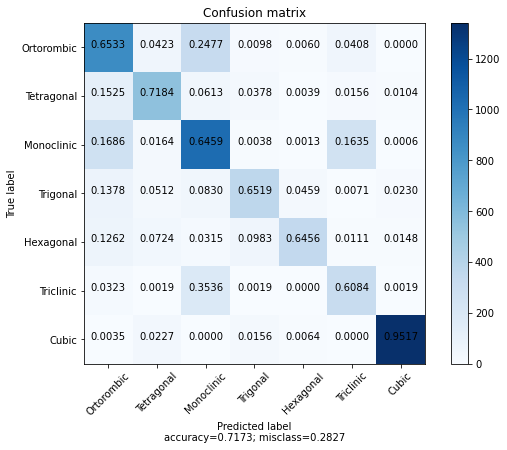

************************************
THRESHOLD 0.5  INDEXES TO DROP:  1333
LEN FILTERED  6456
LEN UNFILTERED  7789
Percentuale casi eliminati 17.11 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.63      0.67      0.65      1266
  Tetragonal       0.76      0.73      0.75       737
  Monoclinic       0.63      0.66      0.64      1500
    Trigonal       0.76      0.66      0.71       545
   Hexagonal       0.89      0.67      0.76       511
   Triclinic       0.50      0.62      0.55       501
       Cubic       0.98      0.96      0.97      1396

    accuracy                           0.73      6456
   macro avg       0.74      0.71      0.72      6456
weighted avg       0.74      0.73      0.73      6456


Accuracy: 0.73

Micro Precision: 0.73
Micro Recall: 0.73
Micro F1-score: 0.73

Macro Precision: 0.74
Macro Recall: 0.71
Macro F1-score: 0.72

Weighted Precision: 0.74
Weighted Recall: 0.73
Weighted F1-score: 0.73


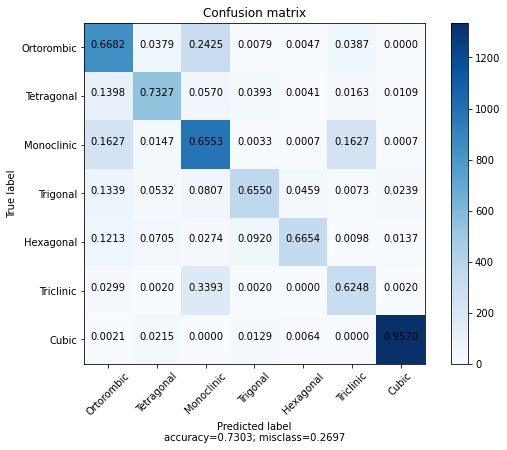

************************************
THRESHOLD 0.6  INDEXES TO DROP:  1628
LEN FILTERED  6161
LEN UNFILTERED  7789
Percentuale casi eliminati 20.9 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.65      0.68      0.67      1206
  Tetragonal       0.78      0.75      0.76       710
  Monoclinic       0.63      0.67      0.65      1395
    Trigonal       0.79      0.68      0.73       515
   Hexagonal       0.90      0.68      0.78       481
   Triclinic       0.51      0.64      0.57       475
       Cubic       0.98      0.96      0.97      1379

    accuracy                           0.74      6161
   macro avg       0.75      0.72      0.73      6161
weighted avg       0.76      0.74      0.75      6161


Accuracy: 0.74

Micro Precision: 0.74
Micro Recall: 0.74
Micro F1-score: 0.74

Macro Precision: 0.75
Macro Recall: 0.72
Macro F1-score: 0.73

Weighted Precision: 0.76
Weighted Recall: 0.74
Weighted F1-score: 0.75


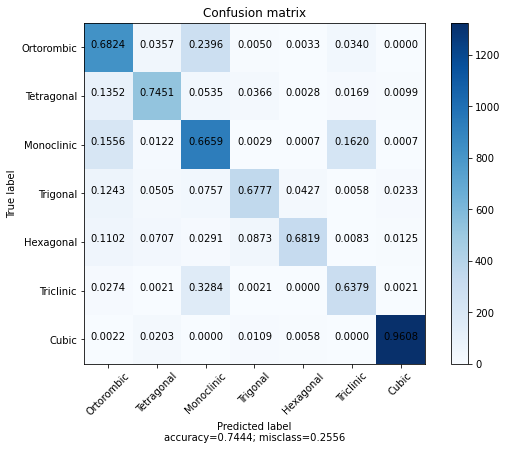

************************************
THRESHOLD 0.7  INDEXES TO DROP:  1971
LEN FILTERED  5818
LEN UNFILTERED  7789
Percentuale casi eliminati 25.3 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.67      0.70      0.68      1133
  Tetragonal       0.80      0.76      0.78       675
  Monoclinic       0.65      0.67      0.66      1289
    Trigonal       0.80      0.71      0.75       475
   Hexagonal       0.92      0.70      0.80       444
   Triclinic       0.52      0.65      0.58       438
       Cubic       0.98      0.97      0.97      1364

    accuracy                           0.76      5818
   macro avg       0.76      0.74      0.75      5818
weighted avg       0.77      0.76      0.76      5818


Accuracy: 0.76

Micro Precision: 0.76
Micro Recall: 0.76
Micro F1-score: 0.76

Macro Precision: 0.76
Macro Recall: 0.74
Macro F1-score: 0.75

Weighted Precision: 0.77
Weighted Recall: 0.76
Weighted F1-score: 0.76


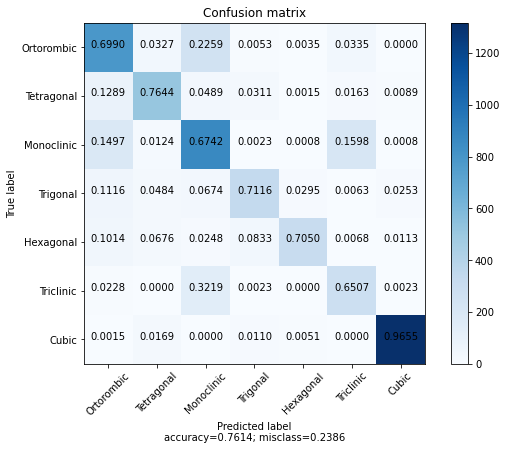

************************************
THRESHOLD 0.8  INDEXES TO DROP:  2420
LEN FILTERED  5369
LEN UNFILTERED  7789
Percentuale casi eliminati 31.07 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.70      0.72      0.71      1028
  Tetragonal       0.83      0.78      0.80       630
  Monoclinic       0.66      0.69      0.67      1140
    Trigonal       0.81      0.74      0.77       424
   Hexagonal       0.93      0.73      0.82       400
   Triclinic       0.54      0.66      0.60       399
       Cubic       0.98      0.97      0.98      1348

    accuracy                           0.78      5369
   macro avg       0.78      0.76      0.76      5369
weighted avg       0.79      0.78      0.79      5369


Accuracy: 0.78

Micro Precision: 0.78
Micro Recall: 0.78
Micro F1-score: 0.78

Macro Precision: 0.78
Macro Recall: 0.76
Macro F1-score: 0.76

Weighted Precision: 0.79
Weighted Recall: 0.78
Weighted F1-score: 0.79


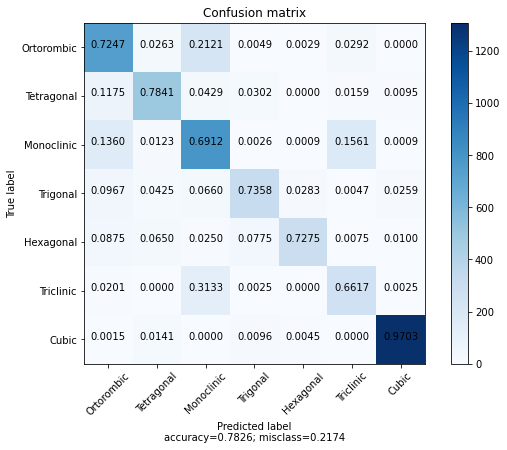

************************************
THRESHOLD 0.9  INDEXES TO DROP:  3073
LEN FILTERED  4716
LEN UNFILTERED  7789
Percentuale casi eliminati 39.45 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.73      0.77      0.75       864
  Tetragonal       0.86      0.82      0.84       562
  Monoclinic       0.68      0.70      0.69       915
    Trigonal       0.85      0.79      0.82       369
   Hexagonal       0.95      0.77      0.85       355
   Triclinic       0.58      0.70      0.63       335
       Cubic       0.99      0.98      0.98      1316

    accuracy                           0.82      4716
   macro avg       0.81      0.79      0.80      4716
weighted avg       0.83      0.82      0.82      4716


Accuracy: 0.82

Micro Precision: 0.82
Micro Recall: 0.82
Micro F1-score: 0.82

Macro Precision: 0.81
Macro Recall: 0.79
Macro F1-score: 0.80

Weighted Precision: 0.83
Weighted Recall: 0.82
Weighted F1-score: 0.82


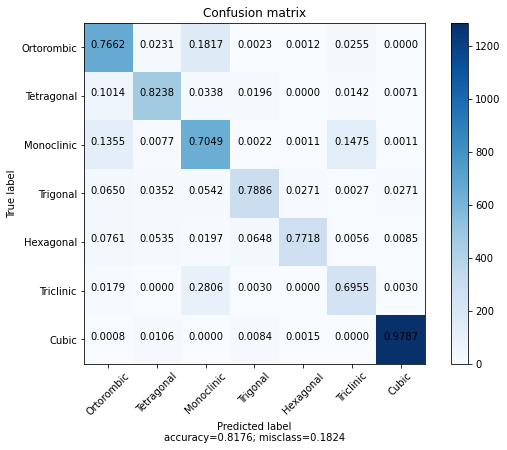

In [16]:
for thr_value in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    threshold=thr_value
    indexes_to_drop=[]
    count=0
    for index, row in results.iterrows():
        conf = row['conf']
        if conf <= threshold:
            indexes_to_drop.append(index)
    print('************************************')
    print('THRESHOLD', threshold, ' INDEXES TO DROP: ', len(indexes_to_drop))
    filtered_results = results[~results.index.isin(indexes_to_drop)].copy()
    print('LEN FILTERED ', len(filtered_results))
    print('LEN UNFILTERED ', len(results))
    percent_dropped = round(len(indexes_to_drop)/len(results)*100, 2)
    print("Percentuale casi eliminati", percent_dropped,"%")
    labels = filtered_results['class'].values
    labels=labels.astype(int)
    probabilities=filtered_results[[0,1,2,3,4,5,6]]
    preds = probabilities.apply(np.argmax, axis=1).values
    accuracy = print_scores(labels, preds)
    thr = len(confidence)
    confidence.loc[thr]=[threshold, accuracy, percent_dropped]

---

In [17]:
confidence

,Threshold,Accuracy,% dropped
0,0.0,0.669277,0.00
1,0.1,0.683690,3.97
2,0.2,0.696639,7.19
3,0.3,0.705655,10.32
4,0.4,0.717304,13.71
5,0.5,0.730328,17.11
6,0.6,0.744360,20.90
7,0.7,0.761430,25.30
8,0.8,0.782641,31.07
9,0.9,0.817642,39.45
